<a href="https://colab.research.google.com/github/VENKATRAJU153/PYTHON-BASICS/blob/main/SML_SALARY09_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [6]:
#import dataset
df = pd.read_csv('/content/Salary_Data.csv')
df.sample(10)

,YearsExperience,Salary
27,9.6,112635.0
3,2.0,43525.0
8,3.2,64445.0
24,8.7,109431.0
13,4.1,57081.0
9,3.7,57189.0
17,5.3,83088.0
7,3.2,54445.0
25,9.0,105582.0
22,7.9,101302.0


In [9]:
df.shape

(30, 2)

In [11]:
# Now allocating colums to X-axis and y-axis
X = df[['YearsExperience']]
y = df[['Salary']]

In [12]:
#Now we are spliting dataset for training and testing into 4 types
# 1) X_train 2)X_test 3)y_train 4) y_test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)
len(X_train),len(y_train)

(24, 24)

In [13]:
len(X_test),len(y_test)

(6, 6)

In [21]:
# Now training the data
training_data = pd.DataFrame(X_train)
training_data['target'] = y_train
training_data

,YearsExperience,target
28,10.3,122391.0
24,8.7,109431.0
12,4.0,56957.0
0,1.1,39343.0
4,2.2,39891.0
16,5.1,66029.0
5,2.9,56642.0
13,4.1,57081.0
11,4.0,55794.0
22,7.9,101302.0


In [22]:
testing_data = pd.DataFrame(X_test)
testing_data['target'] = y_test
testing_data

,YearsExperience,target
27,9.6,112635.0
15,4.9,67938.0
23,8.2,113812.0
17,5.3,83088.0
8,3.2,64445.0
9,3.7,57189.0


In [23]:
#Now we are train the algorithm
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [24]:
reg.coef_

array([[9423.81532303]])

In [25]:
reg.intercept_

array([25321.58301178])

In [26]:
# Now train performance prediction
y_train_predictions =reg.predict(X_train)
y_train_predictions

array([[122386.880839  ],
       [107308.77632215],
       [ 63016.8443039 ],
       [ 35687.77986711],
       [ 46053.97672244],
       [ 73383.04115923],
       [ 52650.64744857],
       [ 63959.2258362 ],
       [ 63016.8443039 ],
       [ 99769.72406372],
       [ 37572.54293172],
       [ 39457.30599632],
       [110135.92091906],
       [ 44169.21365784],
       [ 92230.6718053 ],
       [114847.82858057],
       [ 80922.09341766],
       [124271.6439036 ],
       [ 89403.52720839],
       [ 55477.79204548],
       [ 62074.4627716 ],
       [ 67728.75196542],
       [ 81864.47494996],
       [ 53593.02898087]])

In [27]:
#Now efficiency test between actual points with prediction points using r2_score
from sklearn.metrics import r2_score
r2_score(y_train, y_train_predictions)

0.9645401573418146

In [28]:
# Now train accuracy is
0.9645401573418146 * 100

96.45401573418147

In [29]:
# Now test performance prediction
y_test_predictions =reg.predict(X_test)
y_test_predictions

array([[115790.21011287],
       [ 71498.27809463],
       [102596.86866063],
       [ 75267.80422384],
       [ 55477.79204548],
       [ 60189.69970699]])

In [30]:
#Now efficiency test between test actual points with test prediction points using r2_score
#from sklearn.metrics import r2_score
r2_score(y_test, y_test_predictions)

0.9024461774180497

In [31]:
# Now test accuracy is
0.9024461774180497*100


90.24461774180497

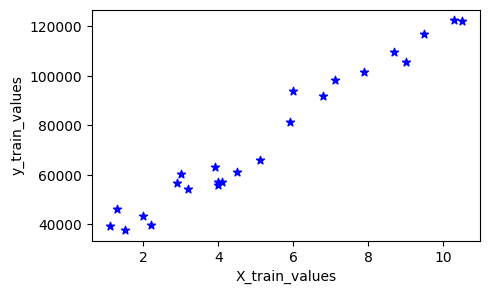

In [33]:
plt.figure(figsize=(5,3))
plt.xlabel('X_train_values')
plt.ylabel('y_train_values')
plt.scatter(x=X_train,y=y_train,color='blue',marker='*')
plt.show()

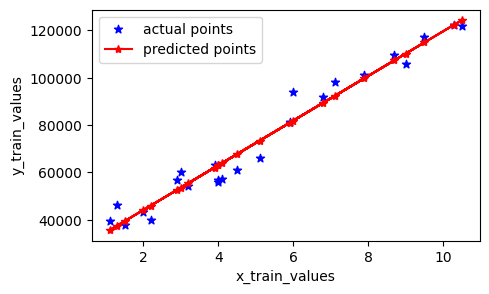

In [34]:
plt.figure(figsize=(5,3))
plt.xlabel('x_train_values')
plt.ylabel('y_train_values')
plt.scatter(x=X_train,y=y_train,color='blue',marker='*',label='actual points')
plt.plot(X_train,y_train_predictions,color='red',marker='*',label='predicted points')
plt.legend(loc=0)
plt.show()

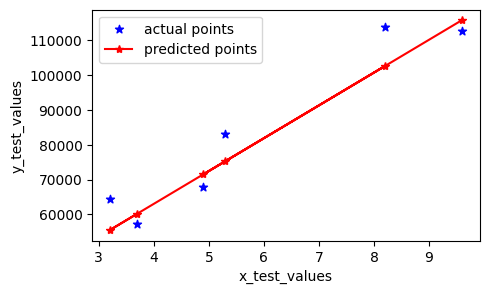

In [35]:
plt.figure(figsize=(5,3))
plt.xlabel('x_test_values')
plt.ylabel('y_test_values')
plt.scatter(x=X_test,y=y_test,color='blue',marker='*',label='actual points')
plt.plot(X_test,y_test_predictions,color='red',marker='*',label='predicted points')
plt.legend(loc=0)
plt.show()

In [43]:
#Now find  differnce r2_score and Ajusted r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
reg = LinearRegression()
reg.fit(df[['YearsExperience']], df['Salary'])
y_pred = reg.predict(df[['YearsExperience']])
r2 = r2_score(df['Salary'], y_pred)

# Adjusted R2 score
n = len(df)
p = 1
adj_r2_score= 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("R2 Score:", r2*100)
print("Adjusted R2 Score:", adj_r2_score*100)

R2 Score: 95.69566641435085
Adjusted R2 Score: 95.54194021486339
